# Figs/Movie of SST/Surface Velocities/TCC

In [1]:
import xarray as xr
import json
import gcsfs
import numpy as np
import cmocean
import cartopy.crs as ccrs #cartopy coord ref sys
import cartopy
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt

In [2]:
#link = "gs://gcp-public-data-arco-era5/co/single-level-reanalysis.zarr-v2"
#link1 = "gs://gcp-public-data-arco-era5/co/single-level-reanalysis.zarr"
ex_link = "gs://gcp-public-data-arco-era5/ar/1959-2022-full_37-1h-0p25deg-chunk-1.zarr-v2"

era5 = xr.open_zarr(ex_link, chunks={'time': 48},consolidated=True,)
#era = xr.open_zarr(link1, chunks={'time': 48},consolidated=True,)

In [3]:
era5

<xarray.Dataset> Size: 534TB
Dimensions:                                           (time: 552264,
                                                       latitude: 721,
                                                       longitude: 1440,
                                                       level: 37)
Coordinates:
  * latitude                                          (latitude) float32 3kB ...
  * level                                             (level) int64 296B 1 .....
  * longitude                                         (longitude) float32 6kB ...
  * time                                              (time) datetime64[ns] 4MB ...
Data variables: (12/31)
    10m_u_component_of_wind                           (time, latitude, longitude) float32 2TB dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    10m_v_component_of_wind                           (time, latitude, longitude) float32 2TB dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    2m_temperature                                    (time, latitude, longitude) float32 2TB dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    angle_of_sub_gridscale_orography                  (latitude, longitude) float32 4MB dask.array<chunksize=(721, 1440), meta=np.ndarray>
    anisotropy_of_sub_gridscale_orography             (latitude, longitude) float32 4MB dask.array<chunksize=(721, 1440), meta=np.ndarray>
    geopotential                                      (time, level, latitude, longitude) float32 85TB dask.array<chunksize=(48, 37, 721, 1440), meta=np.ndarray>
    ...                                                ...
    total_precipitation                               (time, latitude, longitude) float32 2TB dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    type_of_high_vegetation                           (latitude, longitude) float32 4MB dask.array<chunksize=(721, 1440), meta=np.ndarray>
    type_of_low_vegetation                            (latitude, longitude) float32 4MB dask.array<chunksize=(721, 1440), meta=np.ndarray>
    u_component_of_wind                               (time, level, latitude, longitude) float32 85TB dask.array<chunksize=(48, 37, 721, 1440), meta=np.ndarray>
    v_component_of_wind                               (time, level, latitude, longitude) float32 85TB dask.array<chunksize=(48, 37, 721, 1440), meta=np.ndarray>
    vertical_velocity                                 (time, level, latitude, longitude) float32 85TB dask.array<chunksize=(48, 37, 721, 1440), meta=np.ndarray>

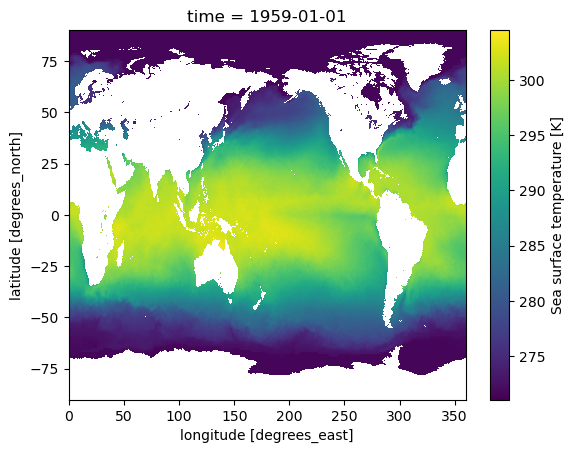

In [6]:
era5.sea_surface_temperature[0].plot()

In [4]:
#longitude = 98˚W to 81˚W
#360minus98, 360minus80
gom = dict(longitude=slice(262, 279), latitude=slice(31, 17.5))

#slice vars to GoM region
sst = era5.sea_surface_temperature.sel(**gom) - 273.15
tcc = era5.total_cloud_cover.sel(**gom)
gp = era5.geopotential.isel(level=0).sel(**gom)
mslp = era5.mean_sea_level_pressure.sel(**gom)
mask = era5.land_sea_mask.sel(**gom)

In [5]:
gp

<xarray.DataArray 'geopotential' (time: 552264, latitude: 55, longitude: 69)> Size: 8GB
dask.array<getitem, shape=(552264, 55, 69), dtype=float32, chunksize=(48, 55, 69), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 220B 31.0 30.75 30.5 30.25 ... 18.0 17.75 17.5
    level      int64 8B 1
  * longitude  (longitude) float32 276B 262.0 262.2 262.5 ... 278.5 278.8 279.0
  * time       (time) datetime64[ns] 4MB 1959-01-01 ... 2021-12-31T23:00:00
Attributes:
    long_name:      Geopotential
    short_name:     z
    standard_name:  geopotential
    units:          m**2 s**-2

In [6]:
mask

<xarray.DataArray 'land_sea_mask' (latitude: 55, longitude: 69)> Size: 15kB
dask.array<getitem, shape=(55, 69), dtype=float32, chunksize=(55, 69), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 220B 31.0 30.75 30.5 30.25 ... 18.0 17.75 17.5
  * longitude  (longitude) float32 276B 262.0 262.2 262.5 ... 278.5 278.8 279.0
Attributes:
    long_name:      Land-sea mask
    short_name:     lsm
    standard_name:  land_binary_mask
    units:          (0 - 1)

In [8]:
mslp

<xarray.DataArray 'mean_sea_level_pressure' (time: 552264, latitude: 55,
                                             longitude: 69)> Size: 8GB
dask.array<getitem, shape=(552264, 55, 69), dtype=float32, chunksize=(48, 55, 69), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 220B 31.0 30.75 30.5 30.25 ... 18.0 17.75 17.5
  * longitude  (longitude) float32 276B 262.0 262.2 262.5 ... 278.5 278.8 279.0
  * time       (time) datetime64[ns] 4MB 1959-01-01 ... 2021-12-31T23:00:00
Attributes:
    long_name:      Mean sea level pressure
    short_name:     msl
    standard_name:  air_pressure_at_mean_sea_level
    units:          Pa

In [9]:
mask.to_netcdf('mask.nc')

In [10]:
mslp.to_netcdf('mslp.nc')

In [ ]:
#took mslp cell 50min to run

In [ ]:
gp.to_netcdf('gp.nc')

In [ ]:
sst = xr.open_dataset('sst.nc')
tcc = xr.open_dataset('tcc.nc')
gp = xr.open_dataset('gp.nc')
mslp = xr.open_dataset('mslp.nc')
mask = xr.open_dataset('mask.nc')

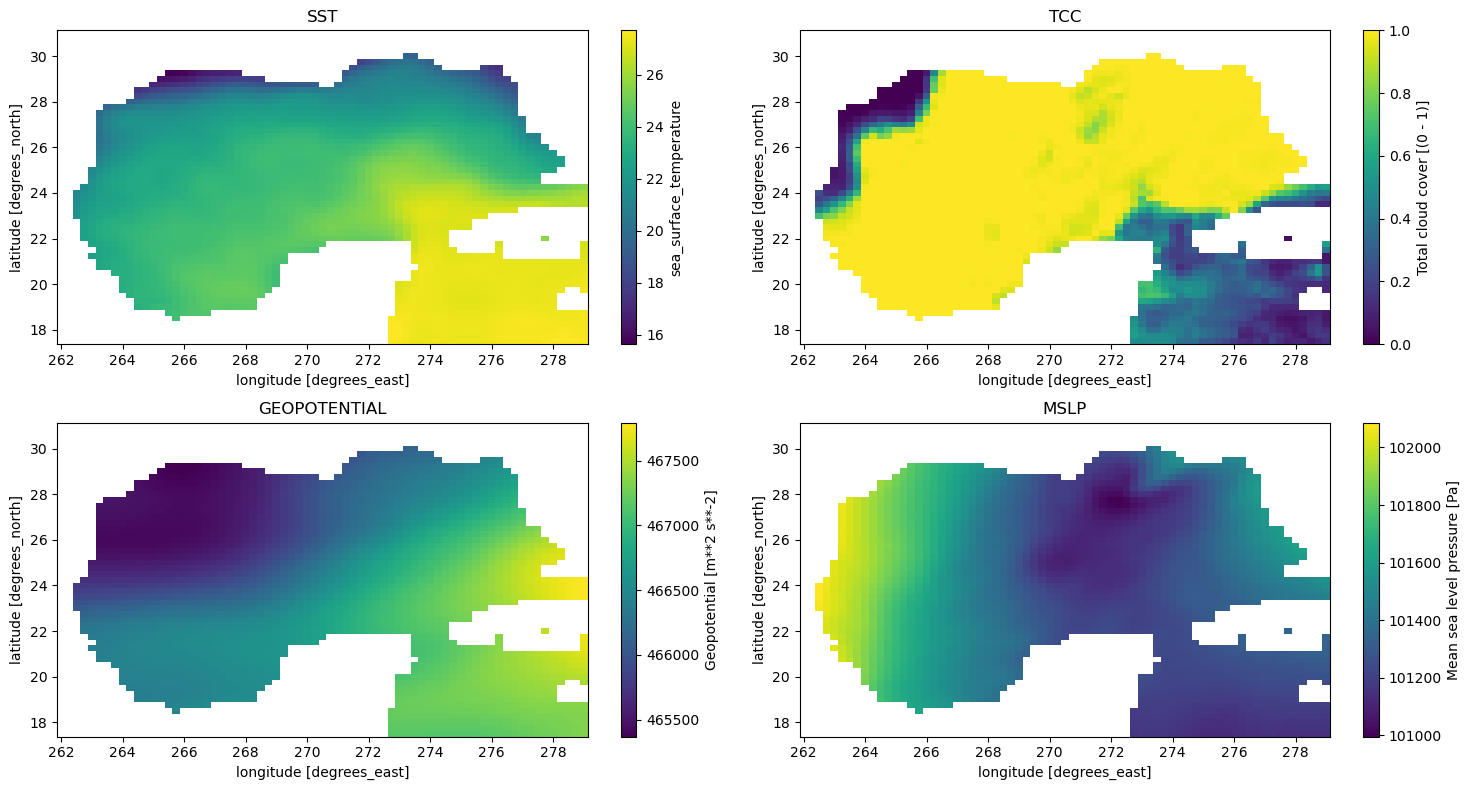

In [8]:
fig, ax = plt.subplots(2,2, figsize=(15,8))
sst[0].where(mask==0).plot(ax=ax[0,0])
ax[0,0].set_title('SST')
tcc[0].where(mask==0).plot(ax=ax[0,1])
ax[0,1].set_title('TCC')
gp[0,0].where(mask==0).plot(ax=ax[1,0])
ax[1,0].set_title('GEOPOTENTIAL')
mslp[0].where(mask==0).plot(ax=ax[1,1])
ax[1,1].set_title('MSLP')
plt.tight_layout();

In [6]:
#Caluclate the anomalies of the vars
sst_anom = sst.groupby('time.dayofyear') - sst.groupby('time.dayofyear').mean('time')
tcc_anom = tcc.groupby('time.dayofyear') - tcc.groupby('time.dayofyear').mean('time')
gp_anom = gp.groupby('time.dayofyear') - gp.groupby('time.dayofyear').mean('time')
mslp_anom = mslp.groupby('time.dayofyear') - mslp.groupby('time.dayofyear').mean('time')

In [7]:
sst_anom.chunk({'latitude':-1, 'longitude':-1, 'time':1000})

<xarray.DataArray 'sea_surface_temperature' (time: 552264, latitude: 55,
                                             longitude: 69)> Size: 8GB
dask.array<rechunk-merge, shape=(552264, 55, 69), dtype=float32, chunksize=(1000, 55, 69), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 220B 31.0 30.75 30.5 30.25 ... 18.0 17.75 17.5
  * longitude  (longitude) float32 276B 262.0 262.2 262.5 ... 278.5 278.8 279.0
  * time       (time) datetime64[ns] 4MB 1959-01-01 ... 2021-12-31T23:00:00
    dayofyear  (time) int64 4MB dask.array<chunksize=(1000,), meta=np.ndarray>

In [15]:
552264/1500

368.176

In [ ]:
sst_anom.to_netcdf('sst_anom.nc')

In [16]:
sst_anom.chunk({'latitude':-1, 'longitude':-1, 'time':1500}).mean('time').where(mask==0)

<xarray.DataArray 'sea_surface_temperature' (latitude: 55, longitude: 69)> Size: 15kB
dask.array<where, shape=(55, 69), dtype=float32, chunksize=(55, 69), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 220B 31.0 30.75 30.5 30.25 ... 18.0 17.75 17.5
  * longitude  (longitude) float32 276B 262.0 262.2 262.5 ... 278.5 278.8 279.0

In [13]:
sst_anom.mean('time').where(mask==0)

<xarray.DataArray 'sea_surface_temperature' (latitude: 55, longitude: 69)> Size: 15kB
dask.array<where, shape=(55, 69), dtype=float32, chunksize=(55, 69), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 220B 31.0 30.75 30.5 30.25 ... 18.0 17.75 17.5
  * longitude  (longitude) float32 276B 262.0 262.2 262.5 ... 278.5 278.8 279.0

In [9]:
from dask.distributed import Client

client = Client("tcp://140.208.147.165:33023")
client

<Client: 'tcp://140.208.147.165:33023' processes=16 threads=16, memory=89.44 GiB>

Task exception was never retrieved
future: <Task finished name='Task-195' coro=<Client._gather.<locals>.wait() done, defined at /home/Shanice.Bailey/.local/lib/python3.11/site-packages/distributed/client.py:2394> exception=AllExit()>
Traceback (most recent call last):
  File "/home/Shanice.Bailey/.local/lib/python3.11/site-packages/distributed/client.py", line 2403, in wait
    raise AllExit()
distributed.client.AllExit


/home/Shanice.Bailey/.local/lib/python3.11/site-packages/distributed/client.py:3370: UserWarning: Sending large graph of size 501.41 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


KilledWorker: Attempted to run task ('getitem-595ad3d7ad92f834585f70c04af80475', 498091, 0, 0) on 4 different workers, but all those workers died while running it. The last worker that attempt to run the task was tcp://140.208.147.21:35073. Inspecting worker logs is often a good next step to diagnose what went wrong. For more information see https://distributed.dask.org/en/stable/killed.html.

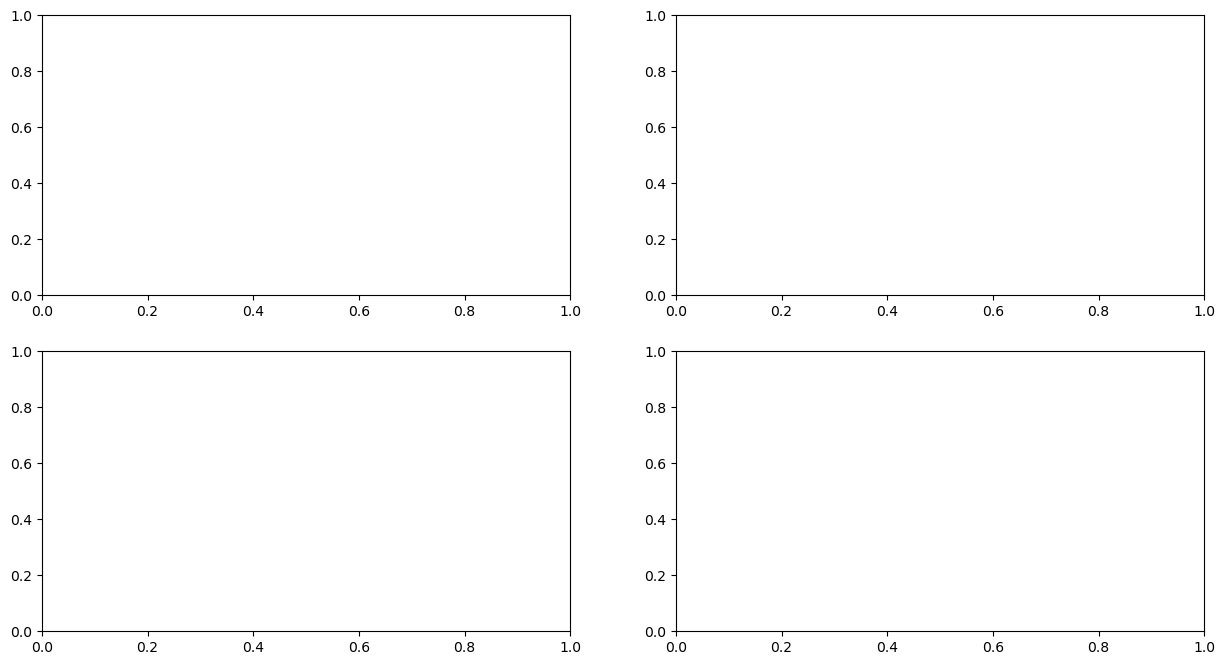

In [18]:
fig, ax = plt.subplots(2,2, figsize=(15,8))
sst_anom.mean('time').where(mask==0).plot(ax=ax[0,0])
ax[0,0].set_title('SST')
tcc_anom.mean('time').where(mask==0).plot(ax=ax[0,1])
ax[0,1].set_title('TCC')
gp_anom.mean('time')[0].where(mask==0).plot(ax=ax[1,0])
ax[1,0].set_title('GEOPOTENTIAL')
mslp_anom.mean('time').where(mask==0).plot(ax=ax[1,1])
ax[1,1].set_title('MSLP')
plt.suptitle('Anomalous')
plt.tight_layout();

## Calculate trends

In [11]:
from scipy.stats import linregress

In [12]:
#linear regression at every grid cell over time, so that we see trend rate at each grid pt
# Calculate the linear trend at each grid point
trend_sst = sst.groupby('time.year').mean('time').polyfit('year', deg=1) #˚C/yr
trend_tcc = tcc.groupby('time.year').mean('time').polyfit('year', deg=1) #˚C/yr
trend_gp = gp.groupby('time.year').mean('time').polyfit('year', deg=1)
trend_mslp = mslp.groupby('time.year').mean('time').polyfit('year', deg=1)

In [ ]:
#linear regression at every grid cell over time, so that we see trend rate at each grid pt
# Calculate the linear trend at each grid point
trend_anom_sst = sst_anom.groupby('time.year').mean('time').polyfit('year', deg=1) #˚C/yr
trend_anom_tcc = tcc_anom.groupby('time.year').mean('time').polyfit('year', deg=1) #˚C/yr
trend_anom_gp = gp_anom.groupby('time.year').mean('time').polyfit('year', deg=1)
trend_anom_mslp = mslp_anom.groupby('time.year').mean('time').polyfit('year', deg=1)

## Trend maps

In [9]:
import matplotlib.ticker as mticker
import cartopy.crs as ccrs #cartopy coord ref sys
import cartopy
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

KeyboardInterrupt: 

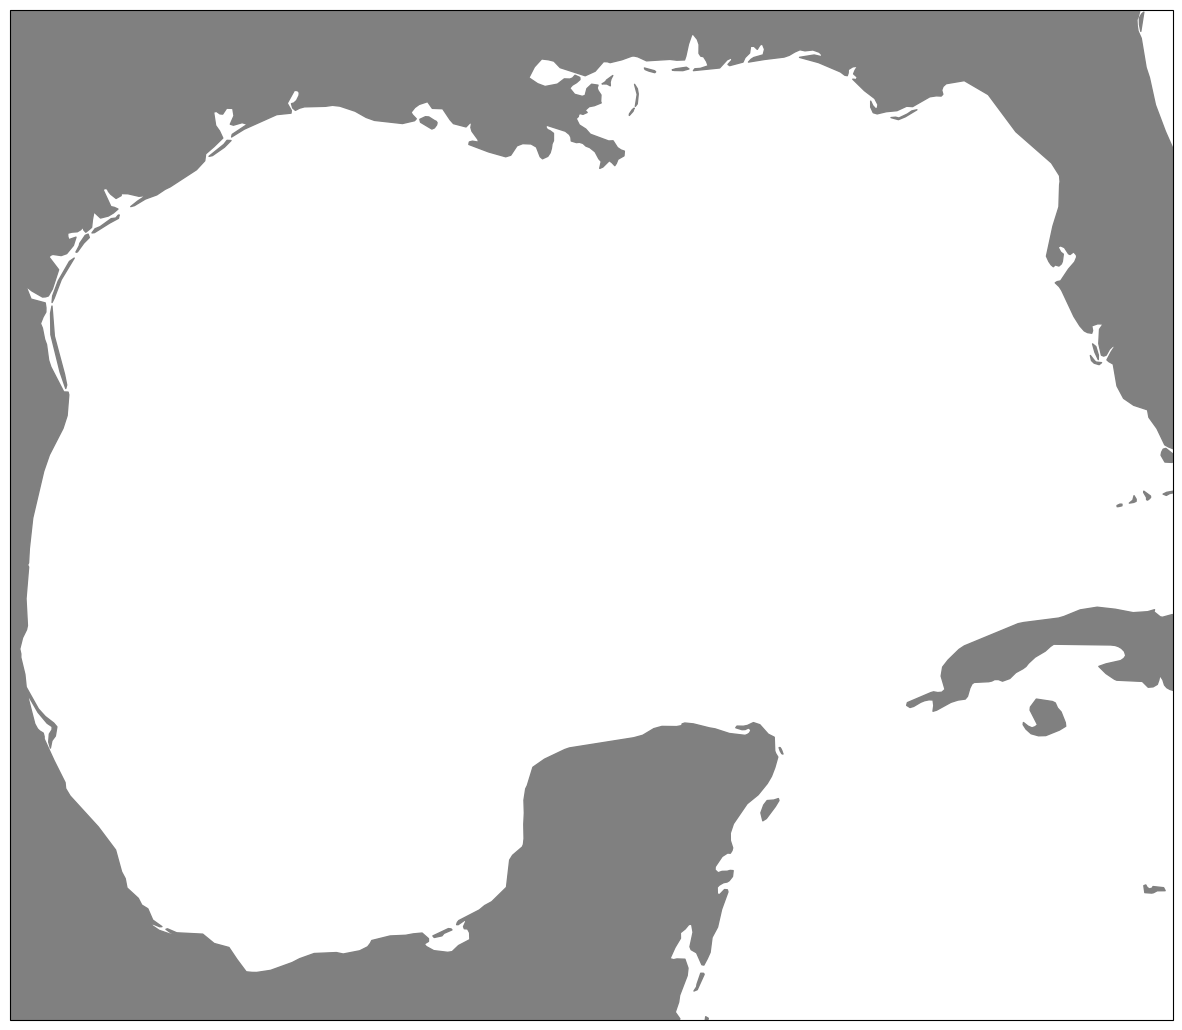

In [10]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=proj))

ax.set_extent([-98, -81, 17.5, 31], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))
da = trend.polyfit_coefficients[0]
im = ax.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
                   cmap='Spectral_r', vmin=-0.01, vmax=0.05)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label(r"Temperature trend (˚C yr $^{-1}$)", labelpad=12, fontsize=20)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

plt.title('SST Warming Trend (1959-2021)', fontsize=26);

In [61]:
trend_line = (trend[0]*np.arange(0,341880) + trend[1])

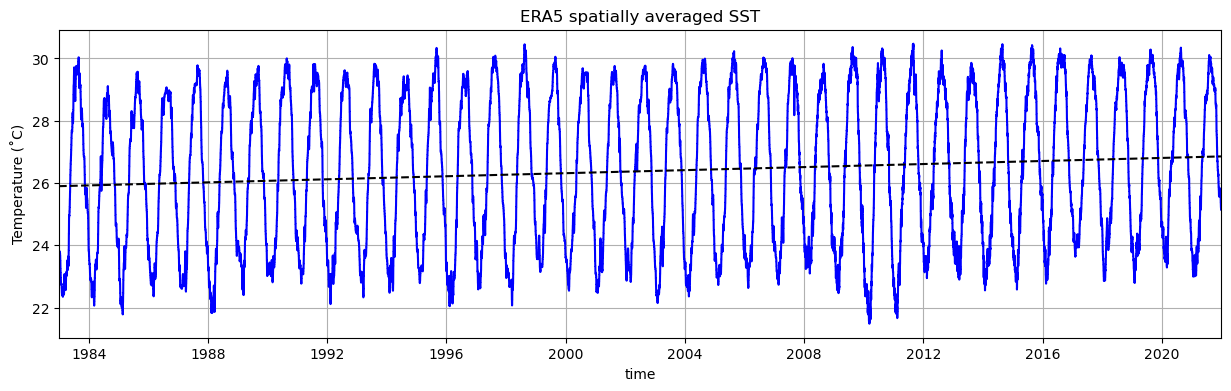

In [64]:
sst_feng.mean(['latitude', 'longitude']).plot(figsize=(15,4), color='blue')
plt.plot(sst_feng.time, trend_line, color='k', linestyle='dashed')
plt.grid()
plt.ylabel('Temperature (˚C)')
plt.xlim(sst_feng.time.sel(time='1983-01-01', method='nearest'), 
         sst_feng.time.sel(time='2021-12-31', method='nearest'))
plt.title('ERA5 spatially averaged SST');

In [68]:
print('Spatially averaged rate of SST increase over 1983-2021:', 
      (trend_line[-1] - trend_line[0]) / (2021-1983), 
      '˚C/yr')

Spatially averaged rate of SST increase over 1983-2021: 0.025146481519222164 ˚C/yr
